In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_excel("Task_students_performance_dataset.xlsx")
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [3]:
print(f"Shape of the Dataset : {df.shape}")


Shape of the Dataset : (300, 20)


In [4]:
print(f"Dataset info :")
df.info()

Dataset info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300

In [5]:
df.describe()

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,54518.876589,6.993096,1.670011,5.468870,5.763599,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,24845.101039,1.734910,0.840759,2.559495,2.476379,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,10111.301178,4.012623,0.101284,1.018167,1.048115,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,32842.034240,5.450614,0.953231,3.226739,4.106060,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,56120.473769,7.144770,1.735533,5.536846,5.873572,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,74997.618701,8.417073,2.436196,7.683439,7.751822,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,99593.244163,9.998283,2.998452,9.995895,9.902960,9.978605,9.000000,67.295712


In [6]:
print(f"Missing values: {df.isnull().sum()}")

Missing values: Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64


In [7]:
print(df.columns)

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Percentage',
       'Previous_Sem_Score', 'Parental_Education', 'Internet_Access',
       'Family_Income', 'Tutoring_Classes', 'Sports_Activity',
       'Extra_Curricular', 'School_Type', 'Sleep_Hours', 'Travel_Time',
       'Test_Anxiety_Level', 'Peer_Influence', 'Teacher_Feedback',
       'Motivation_Level', 'Library_Usage_per_Week', 'Final_Score'],
      dtype='object')


In [8]:
X = df[
    [
        'Study_Hours_per_Week',
        'Attendance_Percentage',
        'Previous_Sem_Score',
        'Sleep_Hours',
        'Travel_Time',
        'Library_Usage_per_Week'
    ]
]

y = df['Final_Score']

X.head(), y.head()


(   Study_Hours_per_Week  Attendance_Percentage  Previous_Sem_Score  \
 0             36.330635              86.628815           38.182863   
 1              9.582476              73.504255           95.788249   
 2              5.795795              65.453321           73.939564   
 3             19.578110              94.381263           53.443393   
 4             39.426018              46.671849           39.749045   
 
    Sleep_Hours  Travel_Time  Library_Usage_per_Week  
 0     6.777112     2.488956                       4  
 1     6.631231     2.192993                       4  
 2     5.311059     0.887486                       5  
 3     6.380781     1.267095                       6  
 4     4.266327     0.397970                       6  ,
 0    44.293533
 1    42.749974
 2    29.846049
 3    44.030395
 4    42.548877
 Name: Final_Score, dtype: float64)

In [9]:
X.assign(Final_Score=y).corr()

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Sleep_Hours,Travel_Time,Library_Usage_per_Week,Final_Score
Study_Hours_per_Week,1.000000,-0.025527,-0.004994,0.003450,-0.073899,0.011453,0.464599
Attendance_Percentage,-0.025527,1.000000,0.057314,-0.037409,-0.139791,-0.058661,0.335473
Previous_Sem_Score,-0.004994,0.057314,1.000000,0.109023,0.102189,-0.083528,0.632940
Sleep_Hours,0.003450,-0.037409,0.109023,1.000000,0.089308,0.066375,0.021040
Travel_Time,-0.073899,-0.139791,0.102189,0.089308,1.000000,-0.000792,-0.037715
Library_Usage_per_Week,0.011453,-0.058661,-0.083528,0.066375,-0.000792,1.000000,-0.111752
Final_Score,0.464599,0.335473,0.632940,0.021040,-0.037715,-0.111752,1.000000


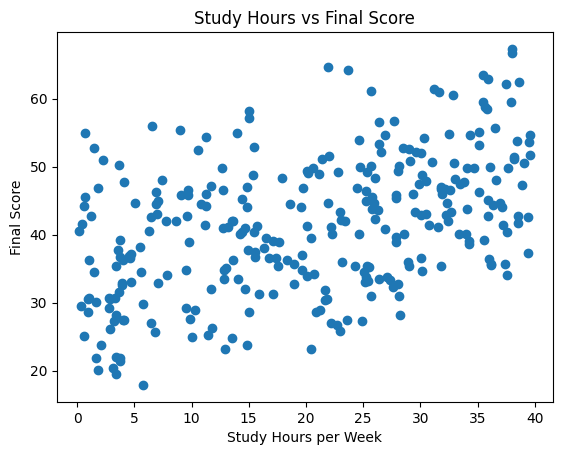

In [10]:
plt.scatter(df['Study_Hours_per_Week'], df['Final_Score'])
plt.xlabel("Study Hours per Week")
plt.ylabel("Final Score")
plt.title("Study Hours vs Final Score")
plt.show()

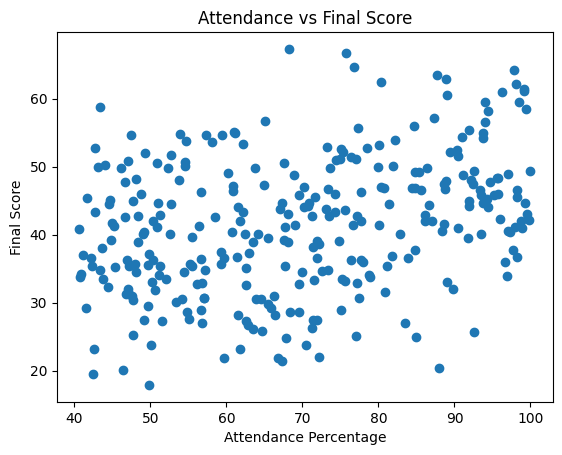

In [11]:
plt.scatter(df['Attendance_Percentage'], df['Final_Score'])
plt.xlabel("Attendance Percentage")
plt.ylabel("Final Score")
plt.title("Attendance vs Final Score")
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

Feature scaling completed


In [30]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully")

Linear Regression model trained successfully


In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 4.87015231018579
MSE: 36.51024676908301
RMSE: 6.042370955931372
R2 Score: 0.611031119217861


In [33]:
comparison = pd.DataFrame({
    "Actual Final Score": y_test.values,
    "Predicted Final Score": y_pred
})
comparison.head()

,Actual Final Score,Predicted Final Score
0,55.900707,47.010307
1,31.972413,36.229513
2,31.845724,31.901358
3,50.811575,47.249148
4,53.198947,40.753105


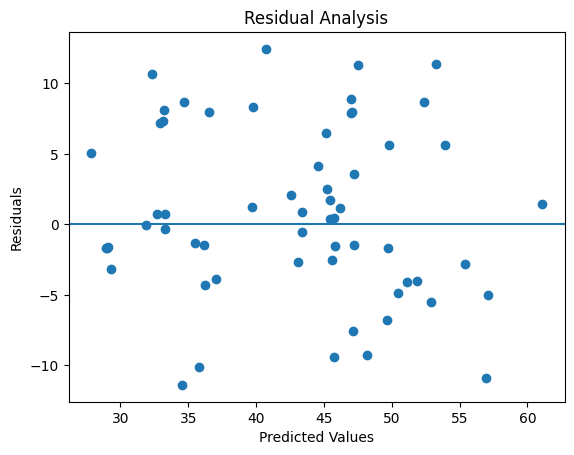

In [34]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

In [38]:
import pickle

with open("student_final_model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")



Model and scaler saved successfully!
